In [17]:
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import pickle

In [18]:
# TODO change the file to your own model.
model_filename = "random_forest_regression.pkl"

random_forest_model = RandomForestRegressor()
with open(model_filename, 'rb') as f:
    random_forest_model = pickle.load(f)

print('Number of features: ', random_forest_model.n_features_in_)
print('Features are (see week 1): ', ['rooms', 'area', 'pop', 'pop_dens', 'frg_pct', 'emp', 'tax_income'])
random_forest_model

Number of features:  7
Features are (see week 1):  ['rooms', 'area', 'pop', 'pop_dens', 'frg_pct', 'emp', 'tax_income']


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


RandomForestRegressor(random_state=42)

In [19]:
df_bfs_data = pd.read_csv('bfs_municipality_and_tax_data.csv', sep=',', encoding='utf-8')
df_bfs_data['tax_income'] = df_bfs_data['tax_income'].str.replace("'", "").astype(float)

In [20]:
locations = {
    "Zürich": 261,
    "Kloten": 62,
    "Uster": 198,
    "Illnau-Effretikon": 296,
    "Feuerthalen": 27,
    "Pfäffikon": 177,
    "Ottenbach": 11,
    "Dübendorf": 191,
    "Richterswil": 138,
    "Maur": 195,
    "Embrach": 56,
    "Bülach": 53,
    "Winterthur": 230,
    "Oetwil am See": 157,
    "Russikon": 178,
    "Obfelden": 10,
    "Wald (ZH)": 120,
    "Niederweningen": 91,
    "Dällikon": 84,
    "Buchs (ZH)": 83,
    "Rüti (ZH)": 118,
    "Hittnau": 173,
    "Bassersdorf": 52,
    "Glattfelden": 58,
    "Opfikon": 66,
    "Hinwil": 117,
    "Regensberg": 95,
    "Langnau am Albis": 136,
    "Dietikon": 243,
    "Erlenbach (ZH)": 151,
    "Kappel am Albis": 6,
    "Stäfa": 158,
    "Zell (ZH)": 231,
    "Turbenthal": 228,
    "Oberglatt": 92,
    "Winkel": 72,
    "Volketswil": 199,
    "Kilchberg (ZH)": 135,
    "Wetzikon (ZH)": 121,
    "Zumikon": 160,
    "Weisslingen": 180,
    "Elsau": 219,
    "Hettlingen": 221,
    "Rüschlikon": 139,
    "Stallikon": 13,
    "Dielsdorf": 86,
    "Wallisellen": 69,
    "Dietlikon": 54,
    "Meilen": 156,
    "Wangen-Brüttisellen": 200,
    "Flaach": 28,
    "Regensdorf": 96,
    "Niederhasli": 90,
    "Bauma": 297,
    "Aesch (ZH)": 241,
    "Schlieren": 247,
    "Dürnten": 113,
    "Unterengstringen": 249,
    "Gossau (ZH)": 115,
    "Oberengstringen": 245,
    "Schleinikon": 98,
    "Aeugst am Albis": 1,
    "Rheinau": 38,
    "Höri": 60,
    "Rickenbach (ZH)": 225,
    "Rafz": 67,
    "Adliswil": 131,
    "Zollikon": 161,
    "Urdorf": 250,
    "Hombrechtikon": 153,
    "Birmensdorf (ZH)": 242,
    "Fehraltorf": 172,
    "Weiach": 102,
    "Männedorf": 155,
    "Küsnacht (ZH)": 154,
    "Hausen am Albis": 4,
    "Hochfelden": 59,
    "Fällanden": 193,
    "Greifensee": 194,
    "Mönchaltorf": 196,
    "Dägerlen": 214,
    "Thalheim an der Thur": 39,
    "Uetikon am See": 159,
    "Seuzach": 227,
    "Uitikon": 248,
    "Affoltern am Albis": 2,
    "Geroldswil": 244,
    "Niederglatt": 89,
    "Thalwil": 141,
    "Rorbas": 68,
    "Pfungen": 224,
    "Weiningen (ZH)": 251,
    "Bubikon": 112,
    "Neftenbach": 223,
    "Mettmenstetten": 9,
    "Otelfingen": 94,
    "Flurlingen": 29,
    "Stadel": 100,
    "Grüningen": 116,
    "Henggart": 31,
    "Dachsen": 25,
    "Bonstetten": 3,
    "Bachenbülach": 51,
    "Horgen": 295
}

In [21]:
# Define the core prediction function
def predict_apartment(rooms, area, town):
    bfs_number = locations[town]
    df = df_bfs_data[df_bfs_data['bfs_number']==bfs_number].copy()
    df.reset_index(inplace=True)
    df.loc[0, 'rooms'] = rooms
    df.loc[0, 'area'] = area
    if len(df) != 1: # if there are more than two records with the same bfs_number reutrn -1
        return -1
    prediction = random_forest_model.predict(df[['rooms', 'area', 'pop', 'pop_dens', 'frg_pct', 'emp', 'tax_income']])
    return np.round(prediction[0], 0)

In [22]:
predict_apartment(3, 100, 'Zürich')

np.float64(4395.0)

In [23]:
# Create the Gradio interface
iface = gr.Interface(
    fn=predict_apartment,
    inputs=["number", "number", gr.Dropdown(choices=locations.keys(), label="Town", type="value")],
    outputs=[gr.Number()],
    examples=[[4.5, 120, "Dietlikon"], [3.5, 60, "Winterthur"]]
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


## Preisvorhersage
Dieser Code-Block enthält die Funktion `predict_apartment`, die auf Basis von Eingaben wie Zimmeranzahl, Wohnfläche und Ort den prognostizierten Apartmentpreis berechnet.


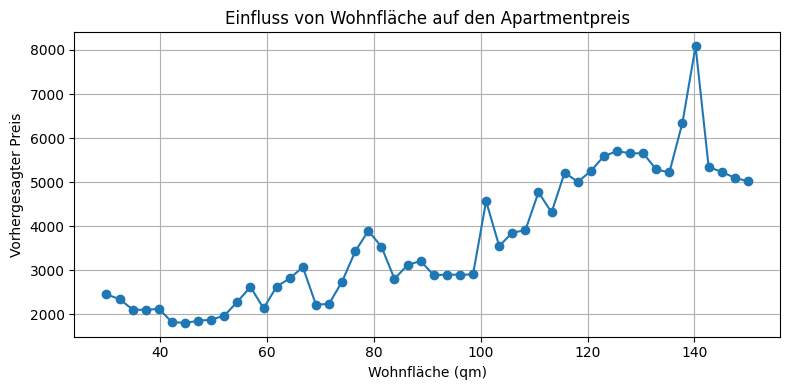

'Visualisierung erstellt'

In [24]:
import matplotlib.pyplot as plt

def visualize_influence(feature='area', fixed_rooms=3, fixed_town='Zürich'):
    # Wir variieren das gewählte Merkmal in einem sinnvollen Bereich.
    if feature == 'area':
        x_values = np.linspace(30, 150, 50)  # Beispiel: Wohnfläche von 30 bis 150 qm
        fixed_value = fixed_rooms
    elif feature == 'rooms':
        x_values = np.arange(1, 6)  # Beispiel: 1 bis 5 Zimmer
        fixed_value = fixed_rooms
    else:
        return "Feature not supported"
    
    predictions = []
    for x in x_values:
        if feature == 'area':
            price = predict_apartment(fixed_rooms, x, fixed_town)
        elif feature == 'rooms':
            price = predict_apartment(x, 100, fixed_town)  # feste Fläche von 100 qm
        predictions.append(price)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x_values, predictions, marker='o')
    plt.xlabel('Wohnfläche (qm)' if feature == 'area' else 'Zimmeranzahl')
    plt.ylabel('Vorhergesagter Preis')
    plt.title(f'Einfluss von {"Wohnfläche" if feature=="area" else "Zimmeranzahl"} auf den Apartmentpreis')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return "Visualisierung erstellt"

# Beispiel: Aufruf der Visualisierung für Wohnfläche
visualize_influence(feature='area', fixed_rooms=3, fixed_town='Zürich')


## Einflussfaktoren-Visualisierung
In diesem Abschnitt wird eine Visualisierungsfunktion implementiert, die zeigt, wie sich einzelne Merkmale (z. B. Wohnfläche oder Zimmeranzahl) auf den vorhergesagten Preis auswirken. Die Funktion `gradio_visualization` generiert einen Plot, der den Einfluss des gewählten Features grafisch darstellt.


In [25]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

# Beispiel-Dictionary (wie in deinem Code)
locations = {
    "Zürich": 261,
    "Kloten": 62,
    "Uster": 198,
    # usw...
}

def predict_apartment(rooms, area, town):
    """
    Deine eigentliche Vorhersagefunktion, 
    die ein Ergebnis (z.B. Preis) zurückgibt.
    """
    # Beispiel: hier einfach Dummy-Rückgabewert
    return rooms * area * 10

########################
# 1) Haupt-Interface (wie bei dir "iface")
########################
def main_predict(rooms, area, town):
    return predict_apartment(rooms, area, town)

iface = gr.Interface(
    fn=main_predict,
    inputs=[
        gr.Number(value=3, label="Zimmeranzahl"),
        gr.Number(value=50, label="Wohnfläche (qm)"),
        gr.Dropdown(choices=list(locations.keys()), label="Ort")
    ],
    outputs="number",
    title="Preisvorhersage"
)

########################
# 2) Visualisierungs-Funktion
########################
def visualize_influence(feature, fixed_rooms, fixed_town):
    """
    Diese Funktion erzeugt ein Matplotlib-Plot als Figure
    und gibt sie zurück.
    """
    # Beispielhaft: Variation des ausgewählten Features
    if feature == "area":
        x_values = np.linspace(30, 150, 10)
        y_values = [predict_apartment(fixed_rooms, x, fixed_town) for x in x_values]
        x_label = "Wohnfläche (qm)"
    else:
        x_values = np.arange(1, 6)
        y_values = [predict_apartment(x, 50, fixed_town) for x in x_values]
        x_label = "Zimmeranzahl"
    
    # Plot erzeugen
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values, marker='o')
    ax.set_xlabel(x_label)
    ax.set_ylabel("Vorhergesagter Preis")
    ax.set_title(f"Einfluss von {x_label} auf den Preis")
    
    # Die fertige Figure zurückgeben
    return fig

def gradio_visualization(feature, fixed_rooms, fixed_town):
    return visualize_influence(feature, fixed_rooms, fixed_town)

visualization_interface = gr.Interface(
    fn=gradio_visualization,
    inputs=[
        gr.Dropdown(choices=["area", "rooms"], label="Feature auswählen"),
        gr.Number(value=3, label="Zimmeranzahl (fest)"),
        gr.Dropdown(choices=list(locations.keys()), label="Ort (fest)")
    ],
    outputs=gr.Plot(),  # Wichtig: Plot-Objekt
    title="Einflussfaktoren-Visualisierung"
)

########################
# 3) Beide Interfaces als Tabs starten
########################
tabs = gr.TabbedInterface(
    interface_list=[iface, visualization_interface],
    tab_names=["Preisvorhersage", "Visualisierung"]
)

tabs.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
